In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [19]:
T= np.linspace(50,5e4,10000)

def Urad(T):
    
    U= np.zeros_like(T)
    
    index=np.argwhere(
          ((T>3e3) & (T<=1e4))
    )
    U[index]= 4*np.pi*(100 + (1e9-100)*(T[index]-3e3)/(1e4-3e3))
    
    index=np.argwhere(
          ((T>1e4) & (T<3e4))
    )
    U[index] = 4*np.pi*(1e9 + (1e11-1e9)*(T[index]-1e4)/(3e4-1e4))
    
    index=np.argwhere(T>3e4) 
    U[index]=4*np.pi*1e11
    
    return U


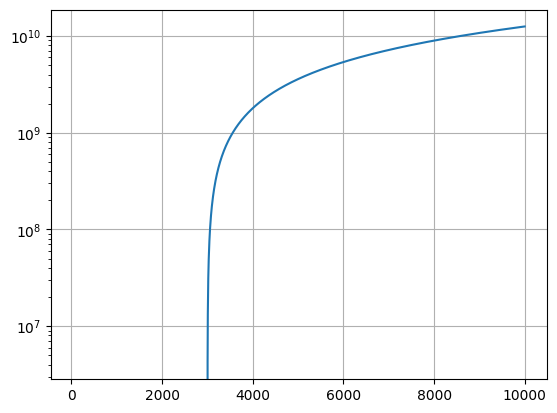

In [27]:
urad=Urad(T)

plt.plot(T[T<1e4],urad[T<1e4])
plt.yscale("log")
plt.grid()